In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

In [276]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

In [277]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()


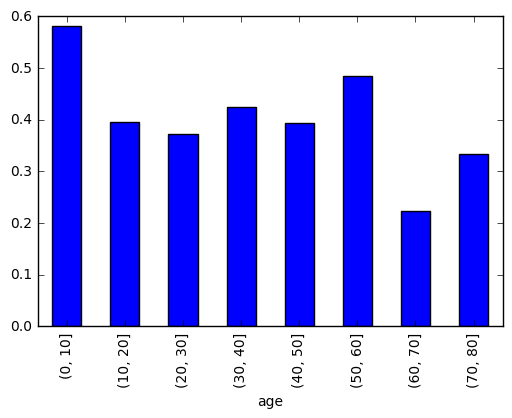

In [278]:
#application of "children and women first" rule to escape the disaster

group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

In [279]:
#titani dataframe

titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)

In [280]:
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")

In [281]:
titanic_df = titanic_df.dropna()

In [282]:
def preprocess_titanic_df(df):
    procsd_df = df.copy()
    le = preprocessing.LabelEncoder()
    procsd_df.sex = le.fit_transform(procsd_df.sex)
    procsd_df.embarked = le.fit_transform(procsd_df.embarked)
    procsd_df = procsd_df.drop(['name','ticket','home.dest'],axis=1)
    return procsd_df

In [283]:

procsd_df = preprocess_titanic_df(titanic_df)

In [284]:
X = procsd_df.drop(['survived'], axis=1).values
y = procsd_df['survived'].values

In [285]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3)

In [286]:
X_train

array([[  3.    ,   1.    ,  21.    , ...,   0.    ,   7.8958,   2.    ],
       [  3.    ,   1.    ,  22.    , ...,   0.    ,   7.125 ,   2.    ],
       [  2.    ,   1.    ,  57.    , ...,   0.    ,  12.35  ,   1.    ],
       ..., 
       [  3.    ,   1.    ,  42.    , ...,   0.    ,   7.55  ,   2.    ],
       [  2.    ,   1.    ,  44.    , ...,   0.    ,  26.    ,   2.    ],
       [  3.    ,   1.    ,  30.    , ...,   0.    ,  16.1   ,   2.    ]])

In [287]:
X_test

array([[  3.    ,   1.    ,  25.    , ...,   0.    ,   7.05  ,   2.    ],
       [  3.    ,   1.    ,  24.    , ...,   0.    ,   9.5   ,   2.    ],
       [  2.    ,   1.    ,  54.    , ...,   0.    ,  26.    ,   2.    ],
       ..., 
       [  3.    ,   1.    ,  15.    , ...,   1.    ,   7.2292,   0.    ],
       [  3.    ,   1.    ,  28.5   , ...,   0.    ,   7.2292,   0.    ],
       [  2.    ,   1.    ,  28.    , ...,   1.    ,  33.    ,   2.    ]])

In [288]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0,

In [289]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1,

In [317]:
#CLASSIFICATION



In [318]:
#Decision tree
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.74440894568690097

In [319]:
#gradientboosting
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8201 (+/- 0.02)


In [320]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

Y_pred = rf.predict(X_test)
rf.score(X_train, y_train)

0.98493150684931507

In [321]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)


0.79863013698630136

In [322]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train, y_train)

0.79315068493150687

In [324]:
#knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.80821917808219179